In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, KFold
%matplotlib inlin

# Phase initiale

In [2]:
PATH_DATA = 'brains.txt'

In [3]:
brains = pd.read_csv(PATH_DATA, sep = '\t')

In [4]:
brains.drop('Index', axis=1, inplace=True)

# Phase de compréhension

In [5]:
brains.head()

,Brain Weight,Body Weight
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


In [6]:
brains.describe()

,Brain Weight,Body Weight
count,62.000000,62.000000
mean,198.789984,283.134194
std,899.158011,930.278942
min,0.005000,0.140000
25%,0.600000,4.250000
50%,3.342500,17.250000
75%,48.202500,166.000000
max,6654.000000,5712.000000


<AxesSubplot:xlabel='Brain Weight', ylabel='Body Weight'>

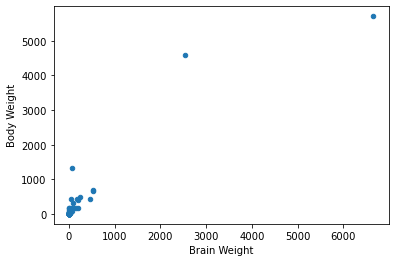

In [7]:
brains.plot.scatter(x='Brain Weight', y='Body Weight')

In [8]:
brains = brains[brains['Brain Weight'] < 500]
x = brains['Brain Weight']
y = brains['Body Weight']

<AxesSubplot:xlabel='Brain Weight', ylabel='Body Weight'>

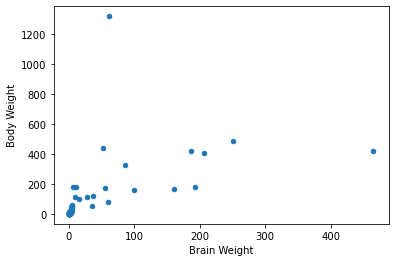

In [9]:
brains.plot.scatter(x='Brain Weight', y='Body Weight')

<ipython-input-10-79c0823ca61e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  xlog10 = brains['Log10 Brain Weight'] = np.log10(x)
<ipython-input-10-79c0823ca61e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ylog10 = brains['Log10 Body Weight'] = np.log10(y)


<AxesSubplot:xlabel='Log10 Brain Weight', ylabel='Log10 Body Weight'>

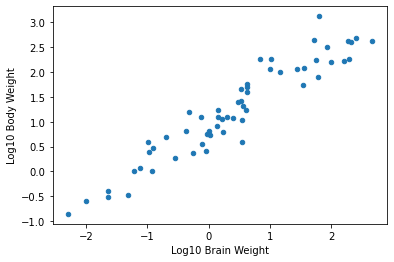

In [10]:
# When we transform correctly our data, we can observe that they have a linear relation
# So, we can apply our LinearRegression here
xlog10 = brains['Log10 Brain Weight'] = np.log10(x)
ylog10 = brains['Log10 Body Weight'] = np.log10(y)
brains.plot.scatter(x='Log10 Brain Weight', y='Log10 Body Weight')

# Phase de création du modèle

In [11]:
estimator = LinearRegression()

In [12]:
# x to X transformations
X_linear = [[x] for x in x]
X_log10 = [[x] for x in xlog10]

In [13]:
params_linear = {
    'estimator': estimator,
    'cv': KFold(n_splits=5, shuffle=True, random_state=1),
    'X': X_linear,
    'y': y,
    'scoring': 'r2'
}

params_log10 = {
    'estimator': estimator,
    'cv': KFold(n_splits=5, shuffle=True, random_state=1),
    'X': X_log10,
    'y': ylog10,
    'scoring': 'r2'
}

In [14]:
cross_val_score(**params_linear).mean()

-0.05077047902874878

In [15]:
cross_val_score(**params_log10).mean()

0.8742960831727118

# Phase de prédiction

In [16]:
values_to_predict = [[3.385], [1.350], [465]]
values_to_predict_log10 = np.log10(values_to_predict)

# estimators
r_linear = LinearRegression()
r_log10 = LinearRegression()

# training
r_linear.fit(X_linear, y)
r_log10.fit(X_log10, ylog10)

LinearRegression()

In [17]:
print("Simple Linear Regression without transformation")

print(r_linear.predict(values_to_predict))

Simple Linear Regression without transformation
[ 58.15945098  55.41626991 680.41671463]


In [18]:
print("Simple Linear Regression with transformation to log10")

predictions = r_log10.predict(values_to_predict_log10)
print(predictions)

Simple Linear Regression with transformation to log10
[1.32847598 1.02690426 2.94342645]


# Phase de représentation

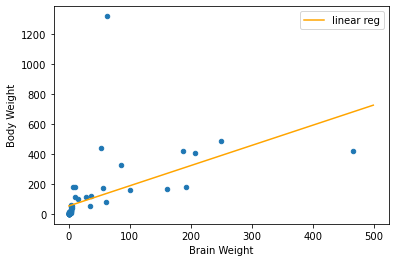

In [19]:
X = np.arange(0, 500)
linear_line = X * r_linear.coef_ + r_linear.intercept_
brains.plot.scatter(x='Brain Weight', y='Body Weight')
plt.plot(X, linear_line, color = 'orange', label='linear reg')
plt.ylabel('Body Weight')
plt.xlabel('Brain Weight')
plt.legend()

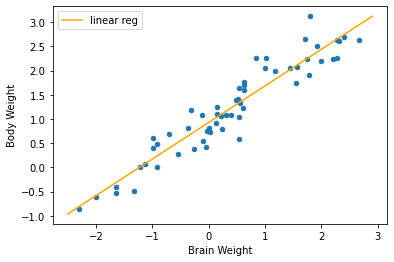

In [20]:
X = np.arange(-2.5, 3, 0.1)
linear_line = X * r_log10.coef_ + r_log10.intercept_
brains.plot.scatter(x='Log10 Brain Weight', y='Log10 Body Weight')
plt.plot(X, linear_line, color = 'orange', label='linear reg')
plt.ylabel('Body Weight')
plt.xlabel('Brain Weight')
plt.legend()